   prim_depth_pf  sec_depth_pf  prim_width_pf  sec_width_pf  \
0       0.171160      0.075229       0.303391      0.468624   
1       0.087388      0.016067       0.310168      0.562362   
2       0.160320      0.097374       0.665738      0.261002   
3       0.075974      0.069464       1.482802      0.916697   
4       0.055456      0.083611       1.462725      0.751267   

   prim_flux_changes  sec_flux_changes  
0           0.984359          0.993095  
1           0.991984          0.998521  
2           0.985342          0.991072  
3           0.993027          0.993623  
4           0.994905          0.992329  


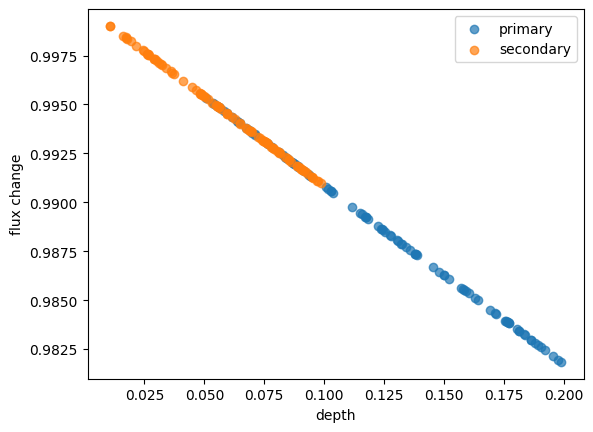

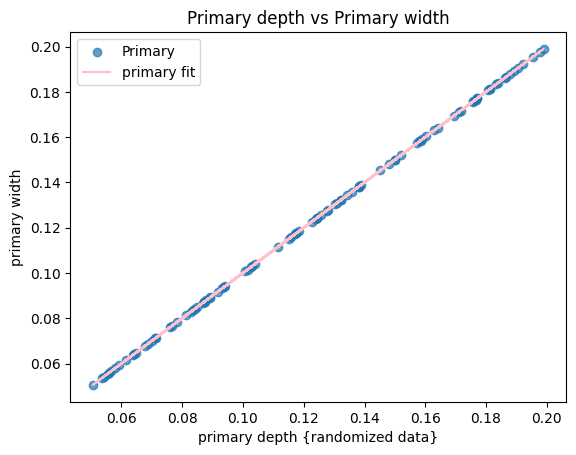

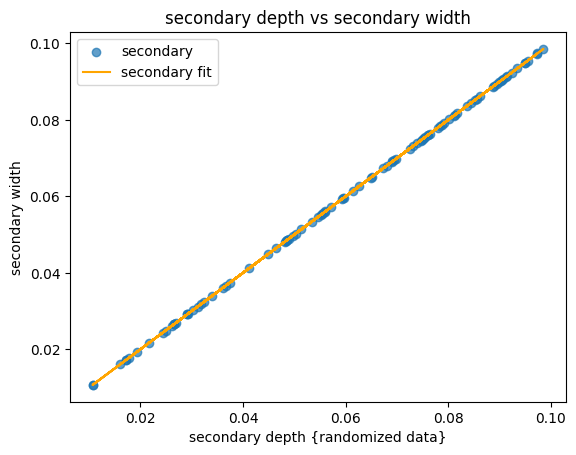

Mean Squared Error(primary randomized data): 1.1940765655200862e-34
     tess_id  signal_id                  date_added  \
0  185259483          1  2020-07-27 20:19:32.475646   
1  307990280          1  2020-07-27 20:19:32.859401   
2  387178621          1  2020-07-27 20:19:32.958864   
3  300560295          1  2020-07-27 20:19:33.639446   
4  318185328          1  2020-07-27 20:19:33.751141   

                date_modified                  source          ra        dec  \
0  2021-09-16 17:36:17.538222  Light Curve File (LCF)  175.108299  -6.102530   
1  2021-09-16 17:36:17.578490  Light Curve File (LCF)  129.235983 -67.744751   
2  2021-09-16 17:36:17.621185  Light Curve File (LCF)  140.414052 -55.907677   
3  2021-09-16 17:36:17.671033  Light Curve File (LCF)  112.915987 -68.133213   
4  2021-09-16 17:36:17.721127  Light Curve File (LCF)  162.141798  -3.624495   

       pmra     pmdec     Tmag  ...  sec_width_pf  sec_depth_pf  sec_pos_pf  \
0   5.76498 -10.34730  10.9183  ...      

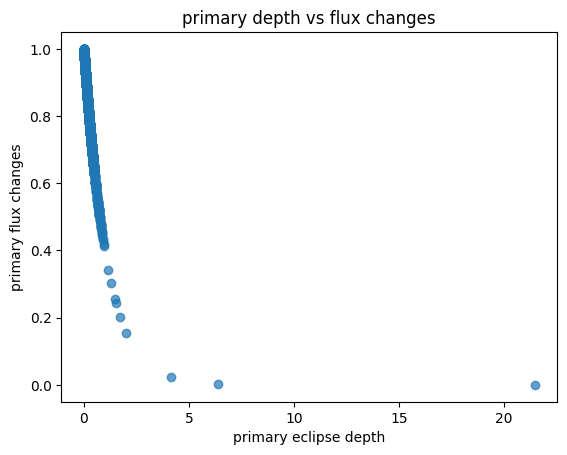

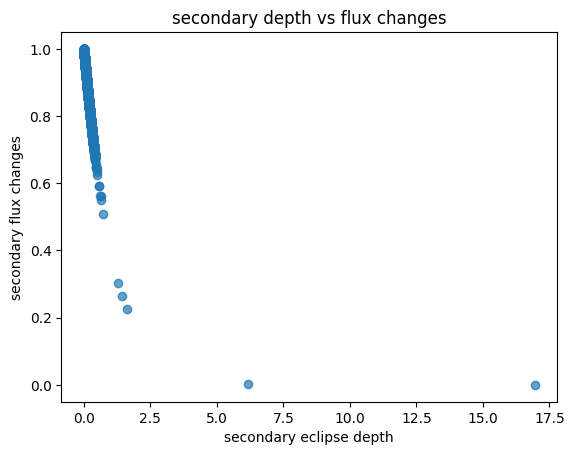

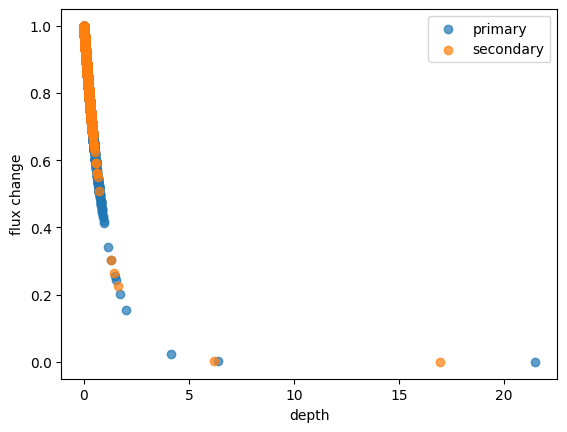

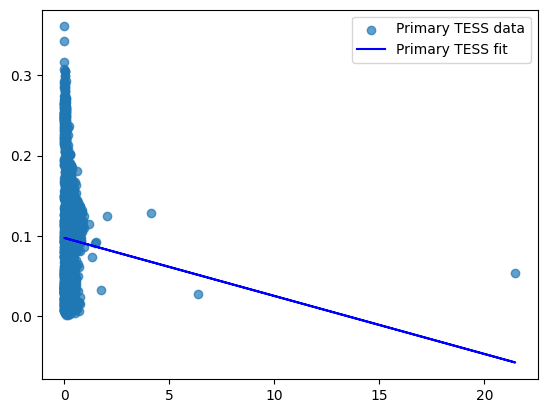

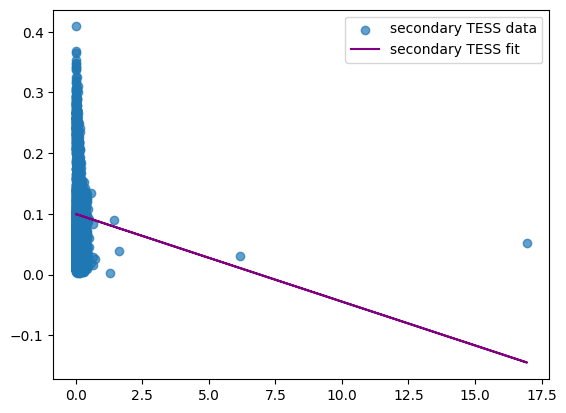

Mean Squared Error(primary tess data): 0.00458148065829142
Mean Squared Error(secondary tess data): 0.0050055218210006205


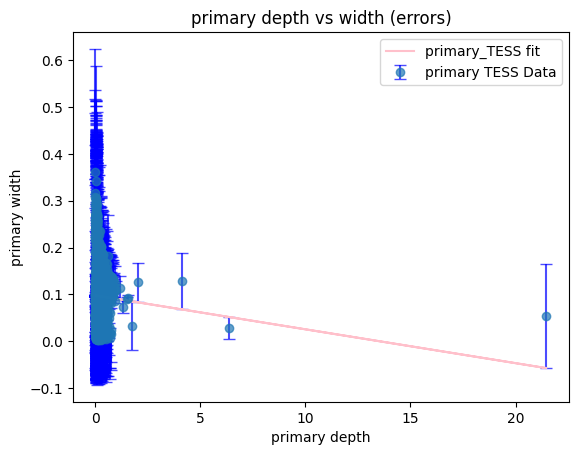

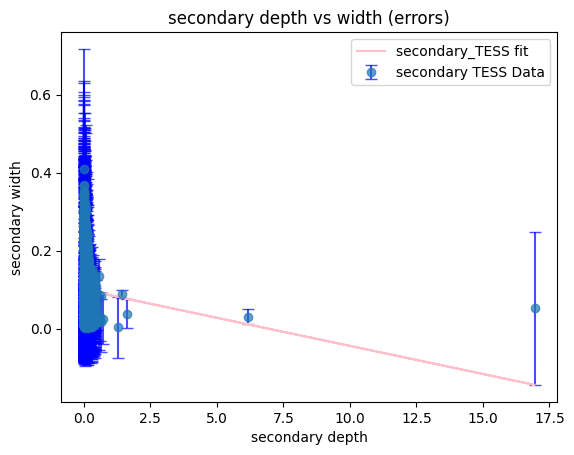

In [43]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

 #generating randomized data to test out methods for real data 
testing_randomized_data = pd.DataFrame({
    'prim_depth_pf': np.random.uniform(0.05, 0.2, 100),
    'sec_depth_pf': np.random.uniform(0.01, 0.1, 100),
    'prim_width_pf': np.random.uniform(0.3, 1.5, 100),
    'sec_width_pf': np.random.uniform(0.2, 1.0, 100)
})
#testing for flux change for the randomized data 
testing_randomized_data['prim_flux_changes'] = 10 **(-0.04 * testing_randomized_data['prim_depth_pf'])
testing_randomized_data['sec_flux_changes'] = 10 ** (-0.04 * testing_randomized_data['sec_depth_pf'])
print(testing_randomized_data.head())

plt.scatter(testing_randomized_data['prim_depth_pf'], testing_randomized_data['prim_flux_changes'], alpha=0.7, label='primary')
plt.scatter(testing_randomized_data['sec_depth_pf'], testing_randomized_data['sec_flux_changes'], alpha=0.7, label='secondary')
plt.xlabel('depth')
plt.ylabel('flux change')
plt.legend()
plt.show()

#line regression testing for randomized set 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_primary_testing =  testing_randomized_data[['prim_depth_pf']]
y_primary_testing = testing_randomized_data[['prim_depth_pf']]
model_primary_testing = LinearRegression().fit(x_primary_testing, y_primary_testing)
y_prim_predicted_testing = model_primary_testing.predict(x_primary_testing)

x_secondary_testing =  testing_randomized_data[['sec_depth_pf']]
y_secondary_testing = testing_randomized_data[['sec_depth_pf']]
model_secondary_testing = LinearRegression().fit(x_secondary_testing, y_secondary_testing)
y_sec_predicted_testing = model_secondary_testing.predict(x_secondary_testing)

#primary randomized data set plot
plt.scatter(x_primary_testing, y_prim_predicted_testing, alpha=0.7,label='Primary')
plt.plot(x_primary_testing, y_prim_predicted_testing, color = 'pink', label='primary fit')
plt.xlabel('primary depth {randomized data}')
plt.ylabel('primary width')
plt.title('Primary depth vs Primary width')
plt.legend()
plt.show()

#secondary randomized data set plot
plt.scatter(x_secondary_testing, y_secondary_testing, alpha=0.7,label='secondary')
plt.plot(x_secondary_testing, y_sec_predicted_testing, color = 'orange', label='secondary fit')
plt.xlabel('secondary depth {randomized data}')
plt.ylabel('secondary width')
plt.title('secondary depth vs secondary width')
plt.legend()
plt.show()

#testing MSE for the randomized data
from sklearn.metrics import mean_squared_error
mse_prim_random = mean_squared_error(y_primary_testing, y_prim_predicted_testing)
print(f"Mean Squared Error(primary randomized data): {mse_prim_random}")

# TESS data set 
data_set_path = '/Users/jessicadiaz/homeworks/BerkeleyHwJessica/final_project-dataset.csv'
data = pd.read_csv(data_set_path)
print(data.head())

#filtering real TESS data set 
relevant_columns = [
    'prim_width_pf', 'prim_depth_pf', 'prim_pos_pf', 'sec_width_pf', 'sec_depth_pf', 'sec_pos_pf', 'prim_width_2g', 'prim_depth_2g', 'prim_pos_2g', 'sec_width_2g', 'sec_depth_2g', 'Tmag']
filtered_eclipse_data =  data[relevant_columns]

filtered_eclipse_data = filtered_eclipse_data.dropna(subset=['prim_depth_pf', 'sec_depth_pf'])
print(filtered_eclipse_data.info())
print(filtered_eclipse_data.head())

#calculating flux with TESS data using given depth for primary and secondary eclipsing 

filtered_eclipse_data['prim_flux_changes'] = 10 **(-0.4 * filtered_eclipse_data['prim_depth_pf'])

filtered_eclipse_data['sec_flux_changes'] = 10 ** ((-0.4 * filtered_eclipse_data['sec_depth_pf']))

print(filtered_eclipse_data[['prim_depth_pf', 'prim_flux_changes', 'sec_depth_pf', 'sec_flux_changes']].head())

#plotting the flux changes 
plt.scatter(filtered_eclipse_data['prim_depth_pf'], filtered_eclipse_data['prim_flux_changes'],  alpha=0.7)
plt.xlabel('primary eclipse depth')
plt.ylabel('primary flux changes')
plt.title('primary depth vs flux changes')
plt.show()

plt.scatter(filtered_eclipse_data['sec_depth_pf'], filtered_eclipse_data['sec_flux_changes'],  alpha=0.7)
plt.xlabel('secondary eclipse depth')
plt.ylabel('secondary flux changes')
plt.title('secondary depth vs flux changes')
plt.show()

#compararing the two graphs 
plt.scatter(filtered_eclipse_data['prim_depth_pf'], filtered_eclipse_data['prim_flux_changes'], alpha=0.7, label='primary')
plt.scatter(filtered_eclipse_data['sec_depth_pf'], filtered_eclipse_data['sec_flux_changes'], alpha=0.7, label='secondary')
plt.xlabel('depth')
plt.ylabel('flux change')
plt.legend()
plt.show()

#testing for accuracy for flux change calculating using line regression
x_primary_TESS =  filtered_eclipse_data[['prim_depth_pf']]
y_primary_TESS = filtered_eclipse_data[['prim_width_pf']]
model_primary_TESS = LinearRegression().fit(x_primary_TESS, y_primary_TESS)
y_primary_predicted_TESS = model_primary_TESS.predict(x_primary_TESS)

x_secondary_TESS =  filtered_eclipse_data[['sec_depth_pf']]
y_secondary_TESS = filtered_eclipse_data[['sec_width_pf']]
model_secondary_TESS = LinearRegression().fit(x_secondary_TESS, y_secondary_TESS)
y_secondary_predicted_TESS = model_secondary_TESS.predict(x_secondary_TESS)

#plotting linear regression for TESS data
plt.scatter(x_primary_TESS, y_primary_TESS, alpha=0.7, label='Primary TESS data')
plt.plot(x_primary_TESS, y_primary_predicted_TESS, color='blue', label='Primary TESS fit')
plt.legend()
plt.show()

plt.scatter(x_secondary_TESS, y_secondary_TESS, alpha=0.7, label='secondary TESS data')
plt.plot(x_secondary_TESS, y_secondary_predicted_TESS, color='purple', label='secondary TESS fit')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
mse_prim_TESS = mean_squared_error(y_primary_TESS, y_primary_predicted_TESS)
print(f"Mean Squared Error(primary tess data): {mse_prim_TESS}")

from sklearn.metrics import mean_squared_error
mse_secondary_TESS = mean_squared_error(y_secondary_TESS, y_secondary_predicted_TESS)
print(f"Mean Squared Error(secondary tess data): {mse_secondary_TESS}")

#error bars for flux calculating using the TESS data

residuals_primary = y_primary_TESS. values.flatten() - y_primary_predicted_TESS.flatten()
yerr_primary = np.abs(residuals_primary)

plt.errorbar(
    x_primary_TESS,
    y_primary_TESS.values.flatten(), 
    yerr=yerr_primary, 
    fmt='o',
    alpha=0.7,
    label='primary TESS Data',
    ecolor='blue',
    capsize=4
)
plt.plot(x_primary_TESS, y_primary_predicted_TESS, color='pink', label='primary_TESS fit')
plt.xlabel('primary depth')
plt.ylabel('primary width')
plt.title('primary depth vs width (errors)')
plt.legend()
plt.show()

residuals_secondary = y_secondary_TESS. values.flatten() - y_secondary_predicted_TESS.flatten()
yerr_secondary = np.abs(residuals_secondary)

plt.errorbar(
    x_secondary_TESS,
    y_secondary_TESS.values.flatten(), 
    yerr=yerr_secondary, 
    fmt='o',
    alpha=0.7,
    label='secondary TESS Data',
    ecolor='blue',
    capsize=4
)
plt.plot(x_secondary_TESS, y_secondary_predicted_TESS, color='pink', label='secondary_TESS fit')
plt.xlabel('secondary depth')
plt.ylabel('secondary width')
plt.title('secondary depth vs width (errors)')
plt.legend()
plt.show()





